# Brownian motion

## 5.1

### a) mean in third case is $$ \bar{x} = \frac{-1+\frac{1-\sqrt3}{2}+\frac{1+\sqrt3}{2} }{3} = 0 $$ and in using variance definition we obtain $$\sigma^2 = 3  $$

In [2]:
#import stuff and input data 
import numpy as np
import matplotlib.pyplot as plt

(array([ 7.,  5.,  9., 17., 15., 16., 14., 11.,  3.,  3.]),
 array([-61. , -48.6, -36.2, -23.8, -11.4,   1. ,  13.4,  25.8,  38.2,
         50.6,  63. ]),
 <BarContainer object of 10 artists>)

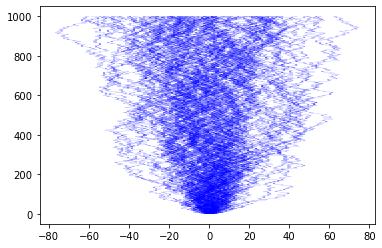

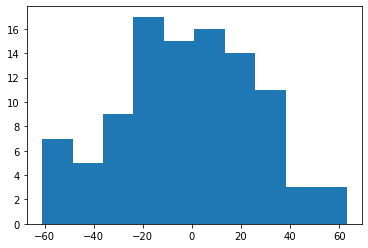

In [3]:
# Flipping coin motion

timesteps = 1000
time = np.round(np.linspace(0,1000,1000))

trajectories = []
for j in range(0,100):
    trajectory = np.zeros([timesteps,1])
    for i in range(0,timesteps-1):
        r = np.random.random(1)
        if r < 0.5:
            trajectory[i+1] = trajectory[i] -1
        else:
            trajectory[i+1] = trajectory[i] +1
    trajectories.append(trajectory)

trajectories = np.array(trajectories)
prob_distribution = trajectories[:,trajectory.size-1]


plt.figure(1)
for path in trajectories:
    plt.plot(path,time,"b",linewidth=0.1)
plt.figure(2)
plt.hist(prob_distribution)

(array([ 3.,  7., 10., 15., 25., 21., 13.,  3.,  2.,  1.]),
 array([-62.94229404, -47.92451519, -32.90673635, -17.8889575 ,
         -2.87117866,  12.14660019,  27.16437903,  42.18215788,
         57.19993672,  72.21771557,  87.23549441]),
 <BarContainer object of 10 artists>)

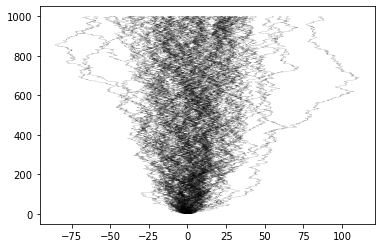

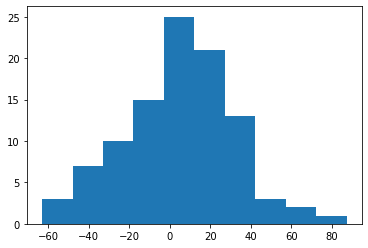

In [4]:
#gaussian distribution motion 
timesteps = 1000
time = np.round(np.linspace(0,1000,1000))

trajectories = []
for j in range(0,100):
    trajectory = np.zeros([timesteps,1])
    for i in range(0,timesteps-1):
        r = np.random.normal(0,1) #mean zero and standard deviation 1 
        trajectory[i+1] = trajectory[i] + r
            
            
    trajectories.append(trajectory)
    
trajectories = np.array(trajectories)
prob_distribution = trajectories[:,trajectory.size-1]
plt.figure(1)
for path in trajectories:
    plt.plot(path,time,"k",linewidth=0.1)
    
plt.figure(2)
plt.hist(prob_distribution)

(array([ 2.,  6.,  8., 17., 22., 19., 16.,  7.,  2.,  1.]),
 array([-77.49038106, -61.33801085, -45.18564065, -29.03327044,
        -12.88090024,   3.27146997,  19.42384018,  35.57621038,
         51.72858059,  67.88095079,  84.033321  ]),
 <BarContainer object of 10 artists>)

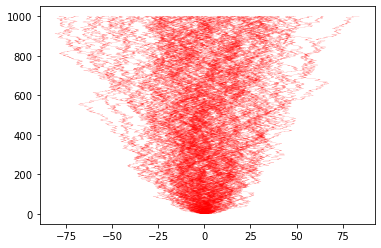

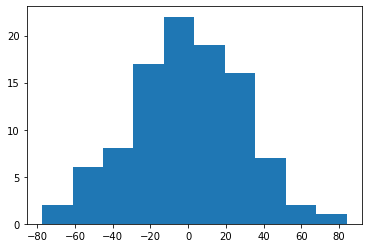

In [4]:
timesteps = 1000
time = np.round(np.linspace(0,1000,1000))

trajectories = []
for j in range(0,100):
    trajectory = np.zeros([timesteps,1])
    for i in range(0,timesteps-1):
        r = np.random.random(1)
        if r < (1/3):
            step = -1
        elif r < (2/3):
            step = (1-np.sqrt(3))/2
        else:
            step = (1+np.sqrt(3))/2
                            
        trajectory[i+1] = trajectory[i] + step
            
    trajectories.append(trajectory)

trajectories = np.array(trajectories)
prob_distribution = trajectories[:,trajectory.size-1]
plt.figure(1)
    
for path in trajectories:
    plt.plot(path,time,"r",linewidth=0.1)
    

plt.figure(2)
plt.hist(prob_distribution)

In [5]:
x = np.array([1,23,44,32,2,21,22,13])
x.size

8

## 5.2

### Part a

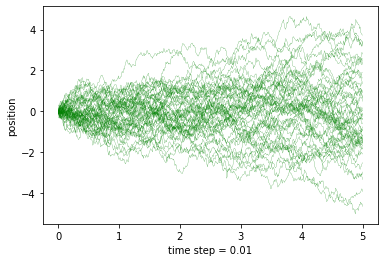

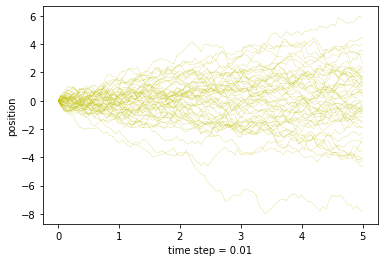

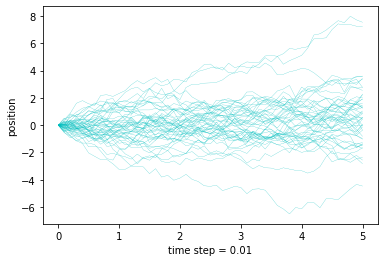

In [6]:
timesteps = [0.01,0.05,0.1]
timestep2 = 0.05
timestep3 = 0.1

all_trajectories={}
for timestep in timesteps:
    trajectories = []
    for i in range(0,50):
        trajectory = []
        x = 0
        t = 0
        while t < 5:
            trajectory.append(x)
            x = x + np.sqrt(timestep) * np.random.normal(0,1)
            t = t + timestep
            
        trajectory = np.array(trajectory)


        #print(trajectory.shape)
        #print(f"hello {}")

        #print(f"x size{x.shape}")
        trajectories.append(trajectory)
    all_trajectories[timestep] = trajectories 


plt.figure(1)
x = np.linspace(0, 5, 501)
for n in range(0, 50):
    plt.plot(x, all_trajectories[0.01][n], "g", linewidth=0.2)
    plt.xlabel("time step = 0.01")
    plt.ylabel("position")

    
plt.figure(2)
x = np.linspace(0,5,101)
for n in range(0,50):
    plt.plot(x,all_trajectories[0.05][n],"y",linewidth=0.2)
    plt.xlabel("time step = 0.01")
    plt.ylabel("position")

plt.figure(3)
x = np.linspace(0,5,51)
for n in range(0,50):
    plt.plot(x,all_trajectories[0.1][n],"c",linewidth=0.2)
    plt.xlabel("time step = 0.01")
    plt.ylabel("position")



    

### Part b

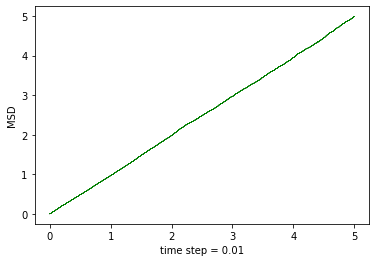

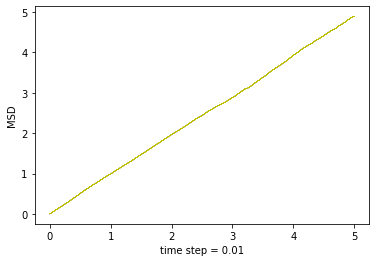

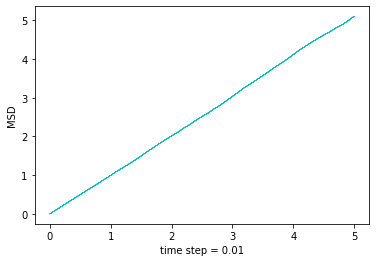

In [8]:
timesteps = [0.01,0.05,0.1]
all_trajectories={}
for timestep in timesteps:
    trajectories = []
    for i in range(0,10**4): #Note 10 to the power of 4 here
        trajectory = []
        x = 0
        t = 0
        while t < 5:
            trajectory.append(x)
            x = x + np.sqrt(timestep) * np.random.normal(0,1)
            t = t + timestep
            
        trajectory = np.array(trajectory)


        #print(trajectory.shape)
        #print(f"hello {}")

        #print(f"x size{x.shape}")
        trajectories.append(trajectory)
    all_trajectories[timestep] = trajectories 


trajectory_lowest = np.array(all_trajectories[0.01])
trajectory_middle = np.array(all_trajectories[0.05])
trajectory_highest = np.array(all_trajectories[0.1])
MSD_1 = np.sum(trajectory_lowest**2,0)/(10**4)
MSD_2 = np.sum(trajectory_middle**2,0)/(10**4)
MSD_3 = np.sum(trajectory_highest**2,0)/(10**4)


plt.figure(1)
x = np.linspace(0, 5, 501)
for n in range(0, 50):
    plt.plot(x, MSD_1, "g", linewidth=0.2)
    plt.xlabel("time step = 0.01")
    plt.ylabel("MSD")

    
plt.figure(2)
x = np.linspace(0,5,101)
for n in range(0,50):
    plt.plot(x,MSD_2,"y",linewidth=0.2)
    plt.xlabel("time step = 0.01")
    plt.ylabel("MSD")

plt.figure(3)
x = np.linspace(0,5,51)
for n in range(0,50):
    plt.plot(x,MSD_3,"c",linewidth=0.2)
    plt.xlabel("time step = 0.01")
    plt.ylabel("MSD")


### 5.3 Brownian motion

### a)

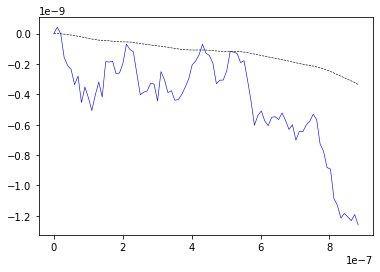

In [7]:
# input data
# This one is for t = tau
R = 1 * (10 ** -6)
m = 1.11 * (10 ** -14)
eta = 0.001  # newtons to powe of minus 1
gamma = 4 * np.pi * eta * R
tau = m / gamma
timestep = 1.0e-08
kb = 1.380649 * 10 ** -23
T = 300

x = 0
x_mass = [0, 0]
t = 0
x_traj = []
while t < tau:
    wi = np.random.normal(0, 1)
    x_traj.append(x)
    x_mass.append(
        x_mass[-1] * (2 + timestep * gamma / m) / (1 + timestep * gamma / m) - 1 / (1 + timestep * gamma / m) * x_mass[-2] +
        (np.sqrt(2 * kb * T * gamma) / (m * (1 + timestep * gamma / m))) * (timestep ** (3 / 2)) * wi)

    x = x + np.sqrt(2 * kb * T * timestep / gamma) * wi

    t = t + timestep
x_mass[0:2] =[]



plt.figure(1)
x = np.linspace(0,tau,len(x_mass))
plt.plot(x,x_mass,"k",linestyle='dashed',linewidth=0.6)
plt.plot(x,x_traj,"b",linewidth=0.6)


In [6]:
tau

8.833099341600193e-07

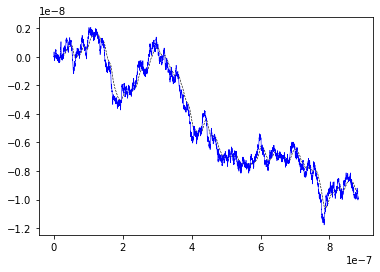

In [8]:
# input data
# This one is for t = 100tau
R = 1 * (10 ** -6)
m = 1.11 * (10 ** -14)
eta = 0.001  # newtons to powe of minus 1
gamma = 4 * np.pi * eta * R
tau = m / gamma
timestep = 1.0e-08
kb = 1.380649 * 10 ** -23
T = 300

x = 0
x_mass = [0, 0]
t = 0
x_traj = []
while t < 100*tau:
    wi = np.random.normal(0, 1)
    x_traj.append(x)
    x_mass.append(
        x_mass[-1] * (2 + timestep * gamma / m) / (1 + timestep * gamma / m) - 1 / (1 + timestep * gamma / m) * x_mass[-2] +
        (np.sqrt(2 * kb * T * gamma) / (m * (1 + timestep * gamma / m))) * (timestep ** (3 / 2)) * wi)

    x = x + np.sqrt(2 * kb * T * timestep / gamma) * wi

    t = t + timestep
x_mass[0:2] =[]



plt.figure(1)
x = np.linspace(0,tau,len(x_mass))
plt.plot(x,x_mass,"k",linestyle='dashed',linewidth=0.6)
plt.plot(x,x_traj,"b",linewidth=0.6)


### b)

<ipython-input-3-75bc707edaf0>:63: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(x),np.log10(MSD_x_mass[1:]),"b",markersize = 0.5)
<ipython-input-3-75bc707edaf0>:64: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(x),np.log10(MSD_x[1:]),"k",markersize = 0.5,linestyle='dashed')


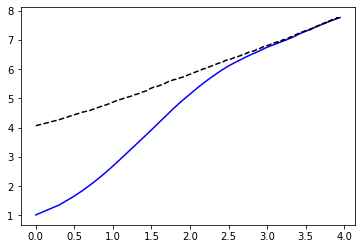

In [3]:
# input data
# This one is for t = 100tau
import numpy as np
import matplotlib.pyplot as plt

R = 1 * (10 ** -9)
m = 1.11 * (10 ** -14)
eta = 0.001  # newtons to powe of minus 1
gamma = 4 * np.pi * eta * R
tau = m / gamma
timestep = 1.0e-05
kb = 1.380649 * 10 ** -23
T = 300



realizations = 10**3

x_traj_list = []
x_mass_list = []




for i in range(0,realizations):
    x = 0
    x_mass = [0, 0]
    t = 0
    x_traj = []
    while t < 100*tau:
        wi = np.random.normal(0, 1)
        x_traj.append(x)
        x_mass.append(
            x_mass[-1] * (2 + timestep * gamma / m) / (1 + timestep * gamma / m) - 1 / (1 + timestep * gamma / m) * x_mass[-2] +
            (np.sqrt(2 * kb * T * gamma) / (m * (1 + timestep * gamma / m))) * (timestep ** (3 / 2)) * wi)

        x = x + np.sqrt(2 * kb * T * timestep / gamma) * wi

        t = t + timestep
    x_mass[0:2] =[]
    x_traj_list.append(x_traj)
    x_mass_list.append(x_mass)

x_mass_total=np.zeros([realizations,len(x_mass)])
x_traj_total=np.zeros([realizations, len(x_mass)])
for i in range(0,realizations) :
    x_mass_total[i,:] = np.array(x_mass_list[i])* 10 **9
    x_traj_total[i, :] = np.array(x_traj_list[i]) *10 **9




MSD_x_mass = np.sum(x_mass_total** 2,0)/(realizations)
MSD_x = np.sum(x_traj_total ** 2,0)/(realizations)






plt.figure(1)
x = range(0,x_mass_total.shape[1]-1)
plt.plot(np.log10(x),np.log10(MSD_x_mass[1:]),"b",markersize = 0.5)
plt.plot(np.log10(x),np.log10(MSD_x[1:]),"k",markersize = 0.5,linestyle='dashed')

### C)
Here we compare a time average of a MSD over a very long trajectory and the average MSD of many trajectories:

(array([   478.,   6980.,  42284., 152890., 284923., 289699., 164829.,
         47057.,   9128.,   1732.]),
 array([-536.78731019, -431.44551997, -326.10372974, -220.76193951,
        -115.42014928,  -10.07835905,   95.26343118,  200.60522141,
         305.94701164,  411.28880187,  516.6305921 ]),
 <BarContainer object of 10 artists>)

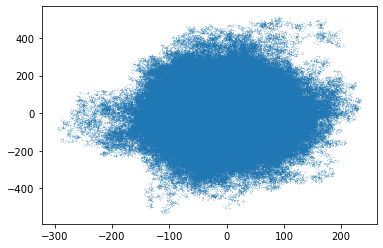

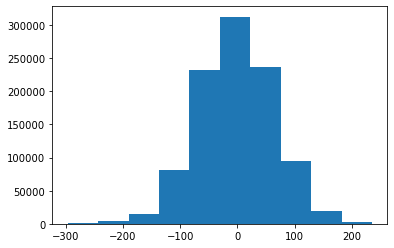

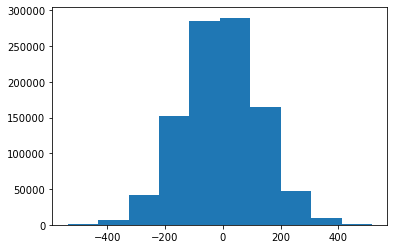

In [10]:
# input data
# This one is for t = 100tau
import numpy as np
import matplotlib.pyplot as plt

#input data
R = 1* 10**-6
eta = 0.001
gamma = 6* np.pi * R * eta
T = 300
kb = 1.380649 * 10 ** -23
kx = 1 * 10**-6
ky = 0.25* 10**-6

timestep_x = (gamma/kx)/ 1000
timestep_y = (gamma/ky)/ 1000

x_traj = []
y_traj = []



x = 0
y = 0
for i in range(0,10**6):
    wi_x = np.random.normal(0, 1)
    wi_y = np.random.normal(0, 1)
    x_traj.append(x)
    y_traj.append(y)
    x = x - (kx/gamma) * x *timestep_x + np.sqrt((2*kb*T*timestep_x)/gamma) * wi_x * 10**9 # converting to nm
    y = y - (ky/gamma) * y *timestep_y + np.sqrt((2*kb*T*timestep_y)/gamma) * wi_y * 10**9 # converting to nm

plt.figure(1)
plt.scatter(x_traj,y_traj,s=0.01)
plt.figure(2)
plt.hist(x_traj)
plt.figure(3)
plt.hist(y_traj)


